In [44]:
import pandas as pd
import numpy as np
from sklearn import svm


# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle
recipes = pd.read_csv('muffin_cupcake_receipe.csv')
recipes.head(4)


,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0


In [33]:
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
svm_model=svm.SVC(kernel='linear')
svm_model.fit(ingredients, type_label)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# Get the separating hyperplane
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (svm_model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = svm_model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svm_model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

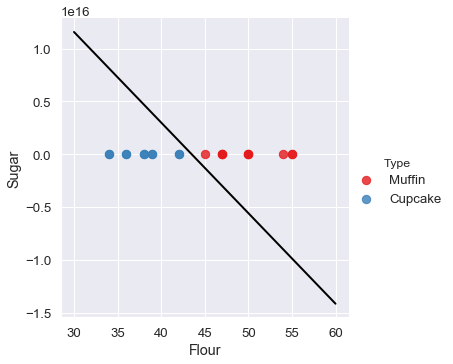

In [37]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

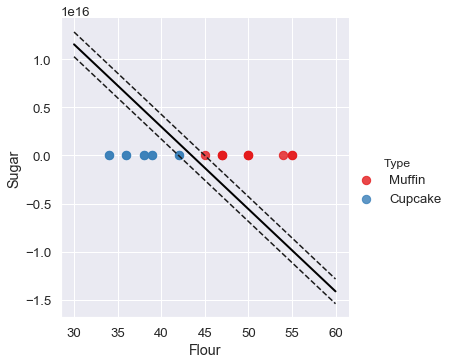

In [40]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [18]:

# Create a function to guess when a recipe is a muffin or a cupcake

def muffin_or_cupcake(flour, sugar):
    if(svm_model.predict([[flour, sugar]]))==0:
        print('You are looking for muffin receipe')
    else:
        print('You are looking for cupcake receipe')

In [41]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You are looking for cupcake receipe


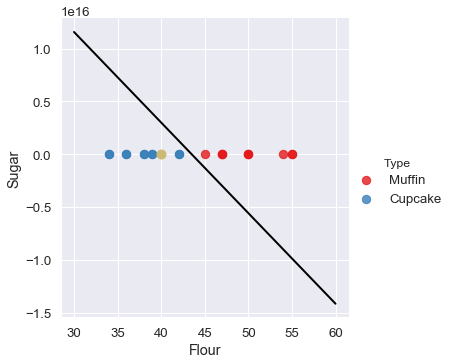

In [42]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40, 20, 'yo', markersize='9');

In [43]:
muffin_or_cupcake(40,20)

You are looking for cupcake receipe
